In [5]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configurações para melhorar a visualização dos gráficos
# Estilo do Seaborn
sns.set_style("whitegrid")
# Aumentar o tamanho padrão das figuras
plt.rcParams['figure.figsize'] = (10, 6)
# Remover a notação científica para números grandes nos gráficos, se for o caso
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
# Definir o caminho para a pasta 'data'
data_path = 'data/'

# Carregar os ficheiros CSV para DataFrames
try:
    df_vendas = pd.read_csv(f'{data_path}vendas.csv', encoding='utf-8')
    df_produtos = pd.read_csv(f'{data_path}produtos.csv', encoding='utf-8')
    df_marketing_campanhas = pd.read_csv(f'{data_path}marketing_campanhas.csv', encoding='utf-8')
    print("Ficheiros carregados com sucesso!")
except FileNotFoundError:
    print(f"Erro: Um ou mais ficheiros não foram encontrados na pasta '{data_path}'.")
    print("Certifique-se de que executou 'gerar_dados.py' e que os ficheiros estão na pasta 'data/'.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar os ficheiros: {e}")

Ficheiros carregados com sucesso!


In [7]:
# --- df_vendas ---
print("--- Visão Geral do DataFrame 'df_vendas' ---")
print(df_vendas.head()) # Ver as primeiras 5 linhas
print("\nInformações sobre colunas e tipos de dados:")
print(df_vendas.info())
print("\nValores nulos por coluna:")
print(df_vendas.isnull().sum())
print("\nEstatísticas descritivas para colunas numéricas:")
print(df_vendas.describe())

# --- df_produtos ---
print("\n\n--- Visão Geral do DataFrame 'df_produtos' ---")
print(df_produtos.head())
print("\nInformações sobre colunas e tipos de dados:")
print(df_produtos.info())
print("\nValores nulos por coluna:")
print(df_produtos.isnull().sum())
print("\nEstatísticas descritivas para colunas numéricas:")
print(df_produtos.describe())

# --- df_marketing_campanhas ---
print("\n\n--- Visão Geral do DataFrame 'df_marketing_campanhas' ---")
print(df_marketing_campanhas.head())
print("\nInformações sobre colunas e tipos de dados:")
print(df_marketing_campanhas.info())
print("\nValores nulos por coluna:")
print(df_marketing_campanhas.isnull().sum())
print("\nEstatísticas descritivas para colunas numéricas:")
print(df_marketing_campanhas.describe())

--- Visão Geral do DataFrame 'df_vendas' ---
      ID_Venda           Data_Venda ID_Produto  Quantidade  Preco_Unitario  \
0  VENDA-00001  2024-09-19 00:00:00  PROD-0224           1        1,840.09   
1  VENDA-00002  2024-11-27 00:00:00  PROD-0483           4        1,952.60   
2  VENDA-00003  2024-12-06 00:00:00  PROD-0117           4          397.98   
3  VENDA-00004  2024-02-20 00:00:00  PROD-0373           3          768.58   
4  VENDA-00005  2024-07-29 00:00:00  PROD-0058           4          335.99   

   Total_Venda ID_Cliente  Canal_Venda Regiao_Cliente  
0     1,840.09  CLI-01231    App Móvel          Porto  
1     7,810.40  CLI-08118    App Móvel         Lisboa  
2     1,591.92  CLI-02921       Online          Porto  
3     2,305.74  CLI-08676  Loja Física          Porto  
4     1,343.96  CLI-00683       Online        Setúbal  

Informações sobre colunas e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns

In [8]:
# --- Célula 4: Limpeza e Preparação de Dados ---

print("A limpar e transformar 'df_vendas'...")
# Converter 'Data_Venda' para o tipo datetime
df_vendas['Data_Venda'] = pd.to_datetime(df_vendas['Data_Venda'])

# Tratar valores nulos em 'Preco_Unitario'
# Opção 1: Remover linhas com Preco_Unitario nulo (se poucos)
# df_vendas.dropna(subset=['Preco_Unitario'], inplace=True)
# Opção 2: Imputar com o preço do produto a partir de df_produtos
# Vamos fazer um merge temporário para preencher os valores nulos
df_vendas = pd.merge(df_vendas, df_produtos[['ID_Produto', 'Preco_Unitario']],
                     on='ID_Produto', how='left', suffixes=('_venda', '_produto'))

# Preencher os Preco_Unitario_venda nulos com Preco_Unitario_produto
df_vendas['Preco_Unitario_venda'].fillna(df_vendas['Preco_Unitario_produto'], inplace=True)
# Se ainda houver nulos (produtos não encontrados ou outros casos), podemos remover ou imputar com a média/mediana
# Por simplicidade, vamos remover quaisquer linhas restantes com Preco_Unitario nulo que não puderam ser preenchidas
df_vendas.dropna(subset=['Preco_Unitario_venda'], inplace=True)
# Atualizar a coluna Total_Venda após a correção do Preco_Unitario
df_vendas['Total_Venda'] = df_vendas['Quantidade'] * df_vendas['Preco_Unitario_venda']
# Remover a coluna auxiliar
df_vendas.drop(columns=['Preco_Unitario_produto'], inplace=True)
# Renomear a coluna de preço de volta para o nome original, se necessário, ou usar o nome corrigido
df_vendas.rename(columns={'Preco_Unitario_venda': 'Preco_Unitario'}, inplace=True)


# Tratar valores nulos em 'Regiao_Cliente'
# Imputar com um valor 'Desconhecido' ou com a moda (região mais comum)
df_vendas['Regiao_Cliente'].fillna('Desconhecido', inplace=True)
# Ou, se houver muitos, pode-se considerar removê-los, mas para região é melhor imputar.

# Verificar novamente os valores nulos após a limpeza
print("\nValores nulos em 'df_vendas' após a limpeza:")
print(df_vendas.isnull().sum())


# --- Limpeza e Transformação para df_marketing_campanhas ---
print("\nA limpar e transformar 'df_marketing_campanhas'...")
# Converter colunas de data para o tipo datetime
df_marketing_campanhas['Data_Inicio'] = pd.to_datetime(df_marketing_campanhas['Data_Inicio'])
df_marketing_campanhas['Data_Fim'] = pd.to_datetime(df_marketing_campanhas['Data_Fim'])

# Não esperamos nulos significativos aqui, mas é bom verificar
print("\nValores nulos em 'df_marketing_campanhas' após a limpeza:")
print(df_marketing_campanhas.isnull().sum())

print("\nLimpeza e preparação de dados concluída!")

A limpar e transformar 'df_vendas'...

Valores nulos em 'df_vendas' após a limpeza:
ID_Venda          0
Data_Venda        0
ID_Produto        0
Quantidade        0
Preco_Unitario    0
Total_Venda       0
ID_Cliente        0
Canal_Venda       0
Regiao_Cliente    0
dtype: int64

A limpar e transformar 'df_marketing_campanhas'...

Valores nulos em 'df_marketing_campanhas' após a limpeza:
ID_Campanha          0
Nome_Campanha        0
Canal_Marketing      0
Data_Inicio          0
Data_Fim             0
Custo_Campanha       0
Impressoes           0
Cliques              0
Vendas_Atribuidas    0
dtype: int64

Limpeza e preparação de dados concluída!


C:\Users\subrg\AppData\Local\Temp\ipykernel_34520\3519299678.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_vendas['Preco_Unitario_venda'].fillna(df_vendas['Preco_Unitario_produto'], inplace=True)
C:\Users\subrg\AppData\Local\Temp\ipykernel_34520\3519299678.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [9]:
# --- Célula 5: Integração de Dados (Merge) ---

print("--- A integrar os DataFrames ---")

# Unir df_vendas com df_produtos para obter informações detalhadas do produto (categoria, marca, custo)
# Usamos 'left' merge para manter todas as vendas, mesmo que um produto não seja encontrado (o que não deve acontecer com os nossos dados gerados)
df_vendas_detalhe = pd.merge(df_vendas, df_produtos, on='ID_Produto', how='left', suffixes=('_venda', '_produto'))

# Calcular a margem de lucro por item e por venda
# Certificar-se de que Custo_Unitario existe e é numérico
df_vendas_detalhe['Custo_Total_Venda'] = df_vendas_detalhe['Quantidade'] * df_vendas_detalhe['Custo_Unitario']
df_vendas_detalhe['Margem_Bruta'] = df_vendas_detalhe['Total_Venda'] - df_vendas_detalhe['Custo_Total_Venda']

print("\nPrimeiras 5 linhas do DataFrame de Vendas Detalhadas:")
print(df_vendas_detalhe.head())

print("\nVerificar colunas e tipos de dados do DataFrame combinado:")
print(df_vendas_detalhe.info())

# Opcional: Integrar informações de campanhas de marketing nas vendas, se houver uma forma clara de atribuição.
# Para este projeto, como 'Vendas_Atribuidas' já é uma métrica nas campanhas, vamos focar na análise das campanhas separadamente
# e correlacionar os períodos de campanha com as vendas gerais, em vez de um merge direto para cada venda.
# No entanto, se tivéssemos IDs de campanha por venda, o merge seria feito aqui.

print("\nIntegração de dados concluída.")

--- A integrar os DataFrames ---

Primeiras 5 linhas do DataFrame de Vendas Detalhadas:
      ID_Venda Data_Venda ID_Produto  Quantidade  Preco_Unitario_venda  \
0  VENDA-00001 2024-09-19  PROD-0224           1              1,840.09   
1  VENDA-00002 2024-11-27  PROD-0483           4              1,952.60   
2  VENDA-00003 2024-12-06  PROD-0117           4                397.98   
3  VENDA-00004 2024-02-20  PROD-0373           3                768.58   
4  VENDA-00005 2024-07-29  PROD-0058           4                335.99   

   Total_Venda ID_Cliente  Canal_Venda Regiao_Cliente  \
0     1,840.09  CLI-01231    App Móvel          Porto   
1     7,810.40  CLI-08118    App Móvel         Lisboa   
2     1,591.92  CLI-02921       Online          Porto   
3     2,305.74  CLI-08676  Loja Física          Porto   
4     1,343.96  CLI-00683       Online        Setúbal   

                                 Nome_Produto    Categoria      Marca  \
0   Synergized secondary task-force Wearables    We

In [10]:
# --- Célula 6: Criação de Novas Métricas/Recursos (Feature Engineering) ---

print("--- A criar novas métricas temporais ---")

# Extrair componentes da data para análise temporal
df_vendas_detalhe['Ano'] = df_vendas_detalhe['Data_Venda'].dt.year
df_vendas_detalhe['Mes'] = df_vendas_detalhe['Data_Venda'].dt.month
df_vendas_detalhe['Dia_da_Semana'] = df_vendas_detalhe['Data_Venda'].dt.day_name()
df_vendas_detalhe['Dia_do_Mes'] = df_vendas_detalhe['Data_Venda'].dt.day
df_vendas_detalhe['Trimestre'] = df_vendas_detalhe['Data_Venda'].dt.quarter
df_vendas_detalhe['Mes_Ano'] = df_vendas_detalhe['Data_Venda'].dt.to_period('M') # Para agrupamento por mês e ano

print("\nPrimeiras 5 linhas do DataFrame com novas colunas temporais:")
print(df_vendas_detalhe[['Data_Venda', 'Ano', 'Mes', 'Dia_da_Semana', 'Trimestre', 'Mes_Ano']].head())

print("\nCriação de novas métricas concluída.")

--- A criar novas métricas temporais ---

Primeiras 5 linhas do DataFrame com novas colunas temporais:
  Data_Venda   Ano  Mes Dia_da_Semana  Trimestre  Mes_Ano
0 2024-09-19  2024    9      Thursday          3  2024-09
1 2024-11-27  2024   11     Wednesday          4  2024-11
2 2024-12-06  2024   12        Friday          4  2024-12
3 2024-02-20  2024    2       Tuesday          1  2024-02
4 2024-07-29  2024    7        Monday          3  2024-07

Criação de novas métricas concluída.


--- A realizar Análise Exploratória de Dados (EDA) Avançada ---

Total de Vendas Geral: 150,699,403.82 EUR
Total de Margem Bruta Geral: 53,117,072.40 EUR
Margem Bruta Percentual: 35.25%


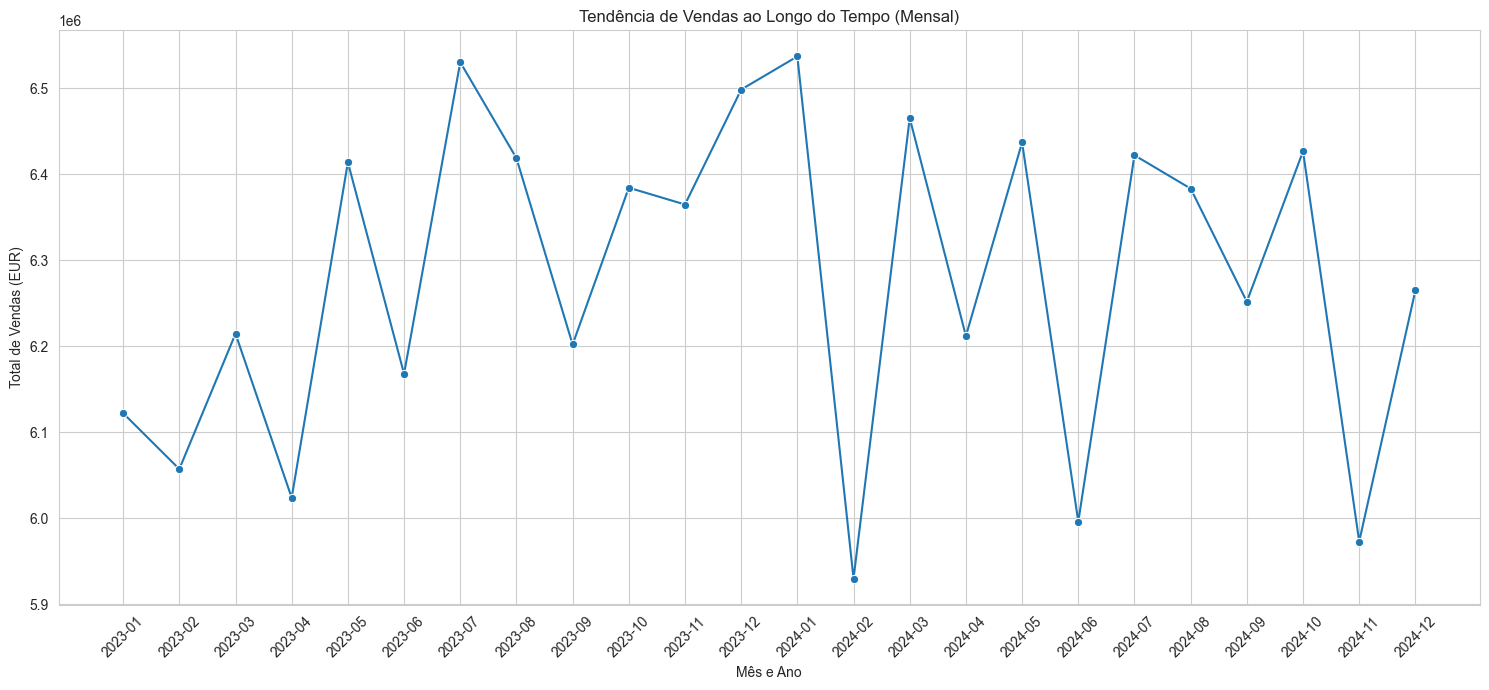

C:\Users\subrg\AppData\Local\Temp\ipykernel_34520\1444618378.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')


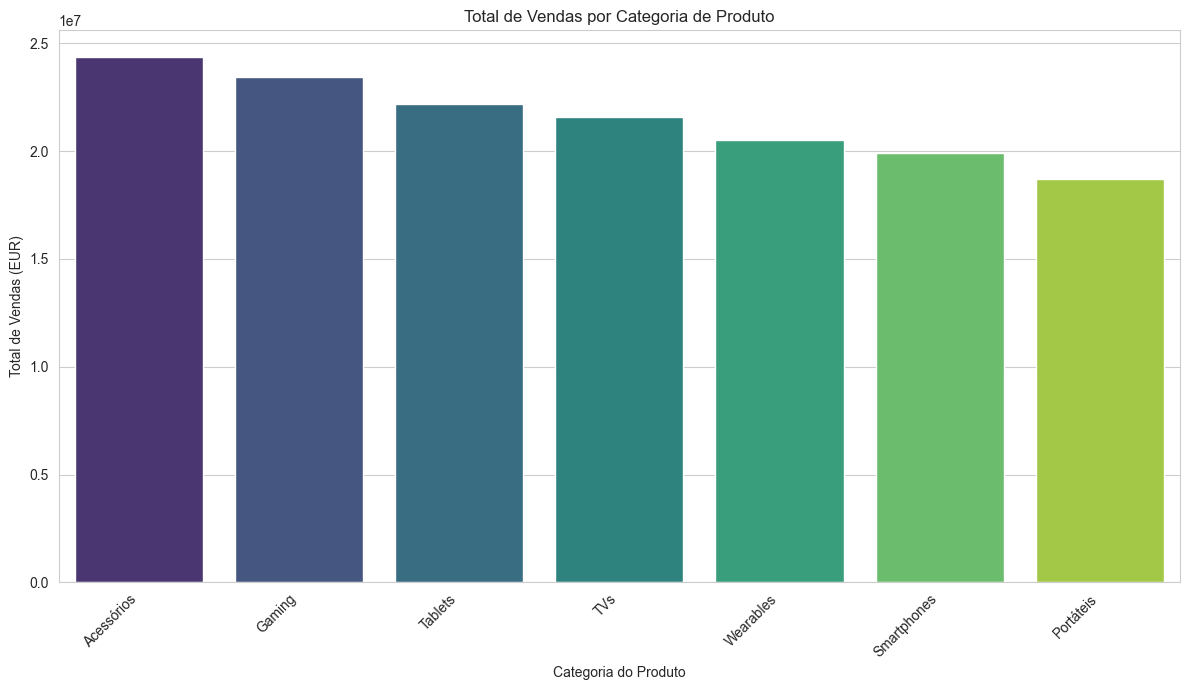

C:\Users\subrg\AppData\Local\Temp\ipykernel_34520\1444618378.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_canal.index, y=vendas_por_canal.values, palette='mako')


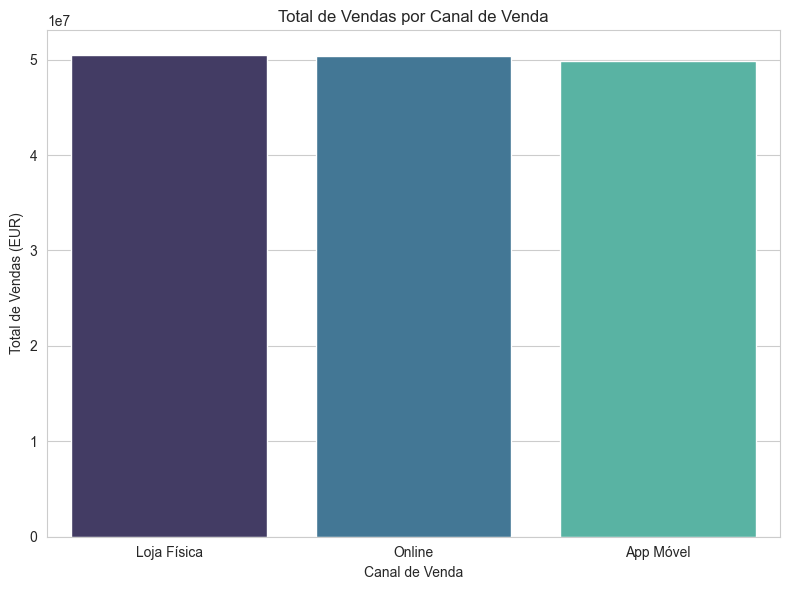

C:\Users\subrg\AppData\Local\Temp\ipykernel_34520\1444618378.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_regiao.index, y=vendas_por_regiao.values, palette='rocket')


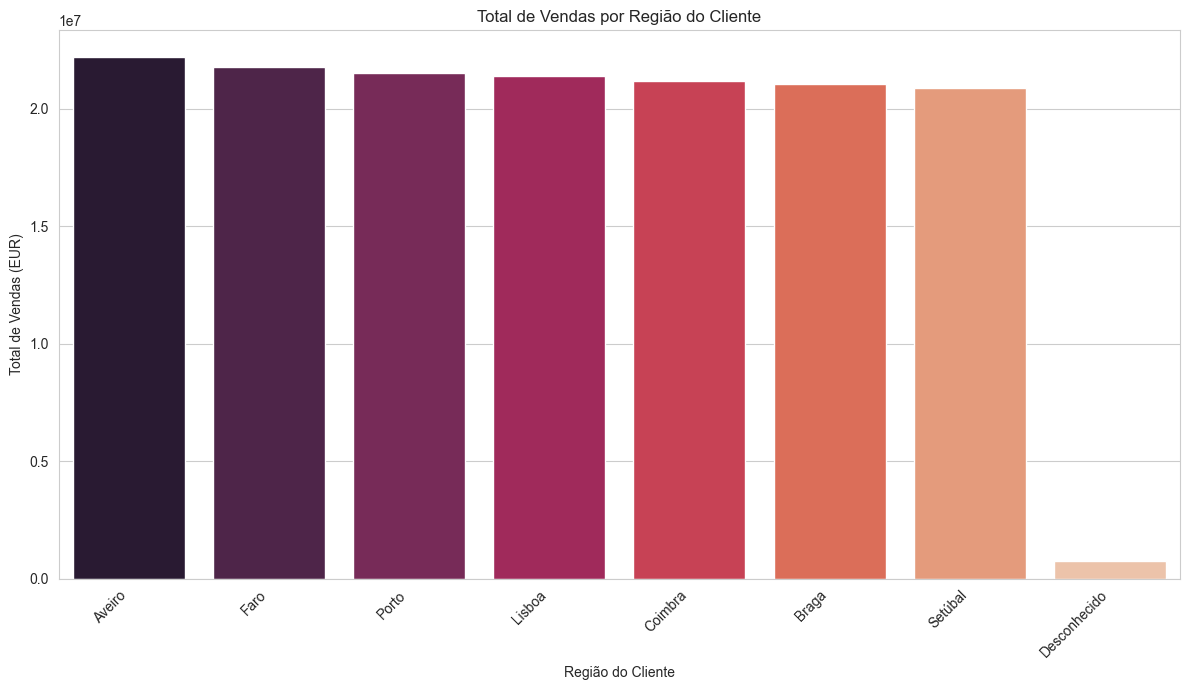

C:\Users\subrg\AppData\Local\Temp\ipykernel_34520\1444618378.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_produtos.index, y=top_10_produtos.values, palette='crest')


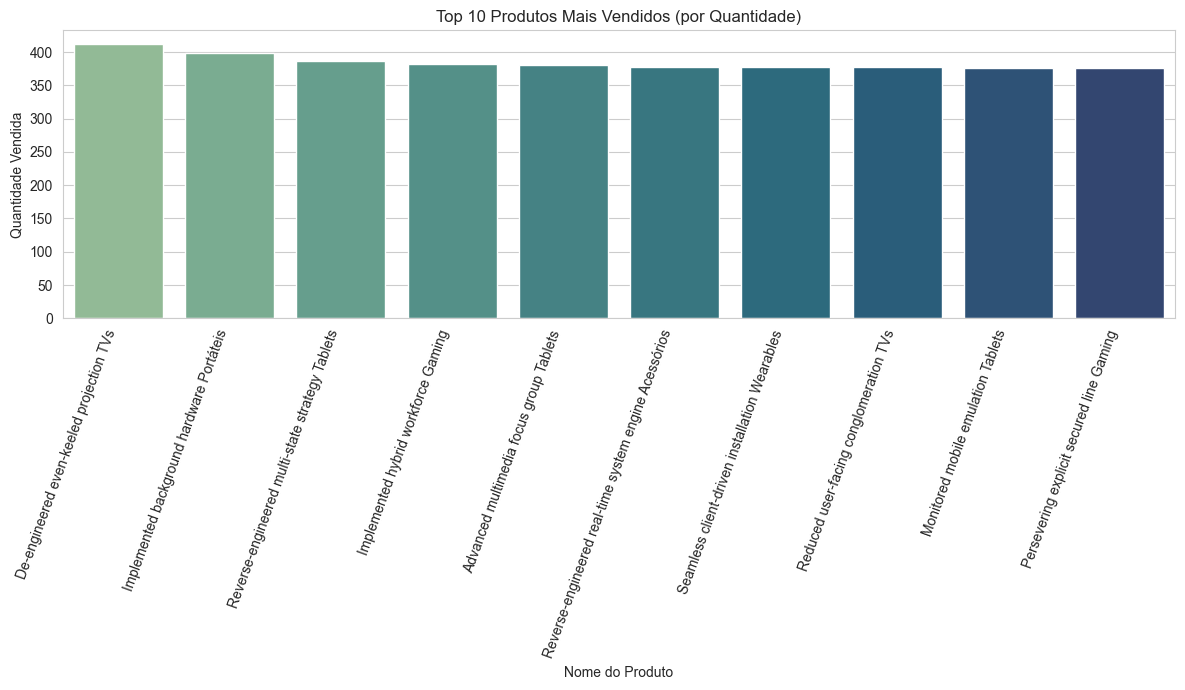


EDA Avançada e visualizações iniciais concluídas.


In [12]:
# --- Célula 7: Análise Exploratória de Dados (EDA) Avançada e Visualizações Iniciais ---

print("--- A realizar Análise Exploratória de Dados (EDA) Avançada ---")

# 1. Total de Vendas e Margem Bruta Geral
total_vendas_geral = df_vendas_detalhe['Total_Venda'].sum()
total_margem_bruta_geral = df_vendas_detalhe['Margem_Bruta'].sum()
print(f"\nTotal de Vendas Geral: {total_vendas_geral:,.2f} EUR")
print(f"Total de Margem Bruta Geral: {total_margem_bruta_geral:,.2f} EUR")
print(f"Margem Bruta Percentual: {total_margem_bruta_geral / total_vendas_geral * 100:,.2f}%")

# 2. Vendas ao Longo do Tempo (por Mês e Ano)
vendas_por_mes_ano = df_vendas_detalhe.groupby('Mes_Ano')['Total_Venda'].sum().to_frame().reset_index()
vendas_por_mes_ano['Mes_Ano'] = vendas_por_mes_ano['Mes_Ano'].astype(str) # Converter para string para plotar facilmente

plt.figure(figsize=(15, 7))
sns.lineplot(data=vendas_por_mes_ano, x='Mes_Ano', y='Total_Venda', marker='o')
plt.title('Tendência de Vendas ao Longo do Tempo (Mensal)')
plt.xlabel('Mês e Ano')
plt.ylabel('Total de Vendas (EUR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Vendas por Categoria de Produto
vendas_por_categoria = df_vendas_detalhe.groupby('Categoria')['Total_Venda'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')
plt.title('Total de Vendas por Categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Total de Vendas (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Vendas por Canal de Venda
vendas_por_canal = df_vendas_detalhe.groupby('Canal_Venda')['Total_Venda'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=vendas_por_canal.index, y=vendas_por_canal.values, palette='mako')
plt.title('Total de Vendas por Canal de Venda')
plt.xlabel('Canal de Venda')
plt.ylabel('Total de Vendas (EUR)')
plt.tight_layout()
plt.show()

# 5. Vendas por Região do Cliente
vendas_por_regiao = df_vendas_detalhe.groupby('Regiao_Cliente')['Total_Venda'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=vendas_por_regiao.index, y=vendas_por_regiao.values, palette='rocket')
plt.title('Total de Vendas por Região do Cliente')
plt.xlabel('Região do Cliente')
plt.ylabel('Total de Vendas (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Produtos Mais Vendidos (Top 10) - AGORA EM PORTUGUÊS
top_10_produtos = df_vendas_detalhe.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_produtos.index, y=top_10_produtos.values, palette='crest')
plt.title('Top 10 Produtos Mais Vendidos (por Quantidade)') # Título em Português
plt.xlabel('Nome do Produto') # Rótulo do eixo X em Português
plt.ylabel('Quantidade Vendida') # Rótulo do eixo Y em Português
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

print("\nEDA Avançada e visualizações iniciais concluídas.")

--- Análise Detalhada do DataFrame 'df_marketing_campanhas' ---

Informações sobre colunas e tipos de dados de df_marketing_campanhas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Campanha        100 non-null    object        
 1   Nome_Campanha      100 non-null    object        
 2   Canal_Marketing    100 non-null    object        
 3   Data_Inicio        100 non-null    datetime64[ns]
 4   Data_Fim           100 non-null    datetime64[ns]
 5   Custo_Campanha     100 non-null    float64       
 6   Impressoes         100 non-null    int64         
 7   Cliques            100 non-null    int64         
 8   Vendas_Atribuidas  100 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 7.2+ KB
None

Estatísticas descritivas para colunas numéricas de marketing:
       C

C:\Users\subrg\AppData\Local\Temp\ipykernel_34520\4093654013.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=custo_por_canal.index, y=custo_por_canal.values, palette='cubehelix')


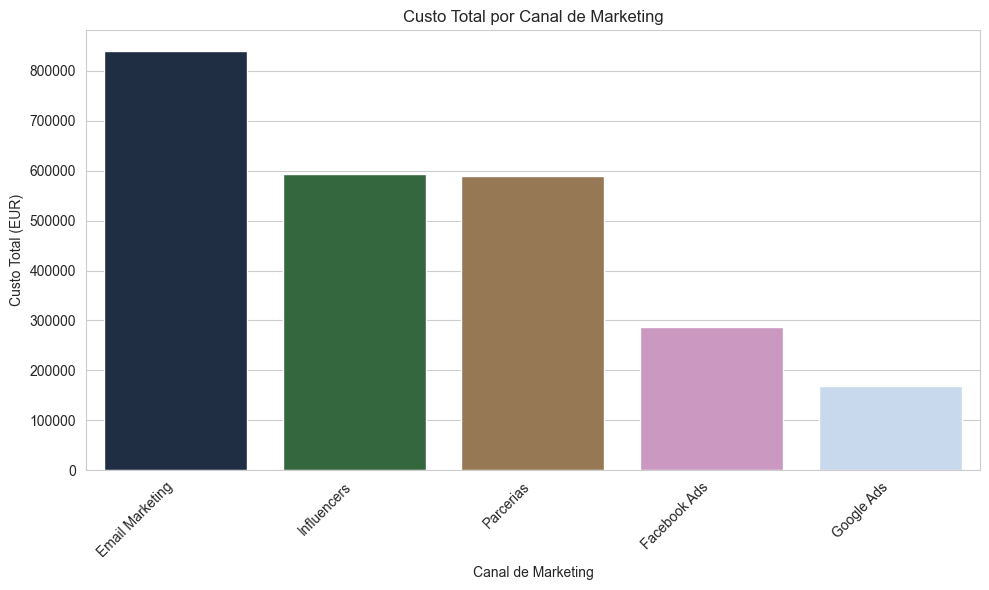

C:\Users\subrg\AppData\Local\Temp\ipykernel_34520\4093654013.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_atrib_por_canal.index, y=vendas_atrib_por_canal.values, palette='viridis')


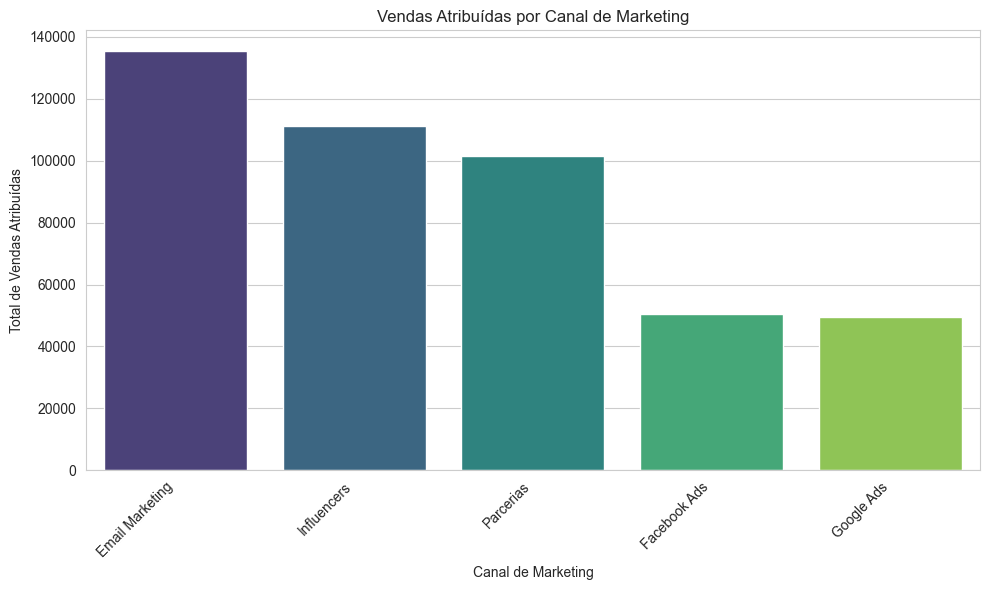


Análise EDA para Campanhas de Marketing concluída.


In [13]:
# --- Célula 8: Análise Exploratória de Dados (EDA) para Campanhas de Marketing ---

print("--- Análise Detalhada do DataFrame 'df_marketing_campanhas' ---")

# Verificar informações gerais e tipos de dados (já fizemos antes, mas reforça)
print("\nInformações sobre colunas e tipos de dados de df_marketing_campanhas:")
print(df_marketing_campanhas.info())

# Estatísticas descritivas para as colunas numéricas de marketing
print("\nEstatísticas descritivas para colunas numéricas de marketing:")
print(df_marketing_campanhas[['Custo_Campanha', 'Impressoes', 'Cliques', 'Vendas_Atribuidas']].describe())

# Distribuição de Campanhas por Canal de Marketing
print("\nContagem de campanhas por Canal de Marketing:")
print(df_marketing_campanhas['Canal_Marketing'].value_counts())

# Custo total por Canal de Marketing
custo_por_canal = df_marketing_campanhas.groupby('Canal_Marketing')['Custo_Campanha'].sum().sort_values(ascending=False)
print("\nCusto total por Canal de Marketing:")
print(custo_por_canal)

# Visualização: Custo por Canal de Marketing
plt.figure(figsize=(10, 6))
sns.barplot(x=custo_por_canal.index, y=custo_por_canal.values, palette='cubehelix')
plt.title('Custo Total por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Custo Total (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualização: Vendas Atribuídas por Canal de Marketing
vendas_atrib_por_canal = df_marketing_campanhas.groupby('Canal_Marketing')['Vendas_Atribuidas'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_atrib_por_canal.index, y=vendas_atrib_por_canal.values, palette='viridis')
plt.title('Vendas Atribuídas por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Vendas Atribuídas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAnálise EDA para Campanhas de Marketing concluída.")

--- A calcular Métricas de Desempenho de Marketing ---

Primeiras 5 linhas do DataFrame de Campanhas com ROI e CAC:
                 Nome_Campanha  Custo_Campanha  Vendas_Atribuidas   ROI   CAC
0   Dignissimos Velit Campanha       34,956.77               1274 -0.96 27.44
1  Debitis Reiciendis Campanha       36,220.77              11877 -0.67  3.05
2      Nulla Possimus Campanha        7,314.10               1149 -0.84  6.37
3       Repellat Quos Campanha       47,201.59               2163 -0.95 21.82
4   Officia Excepturi Campanha       34,938.40              10912 -0.69  3.20


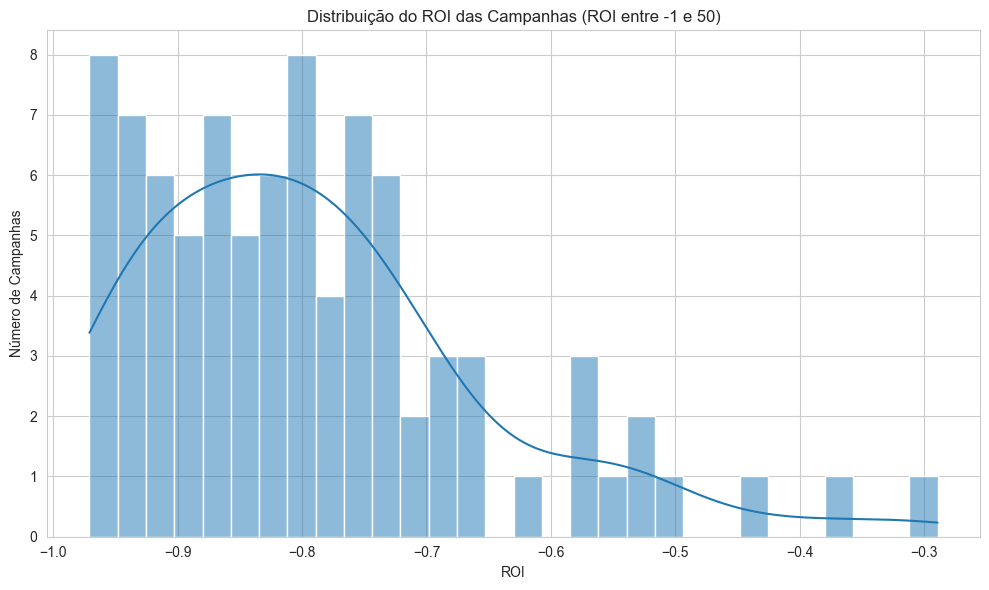

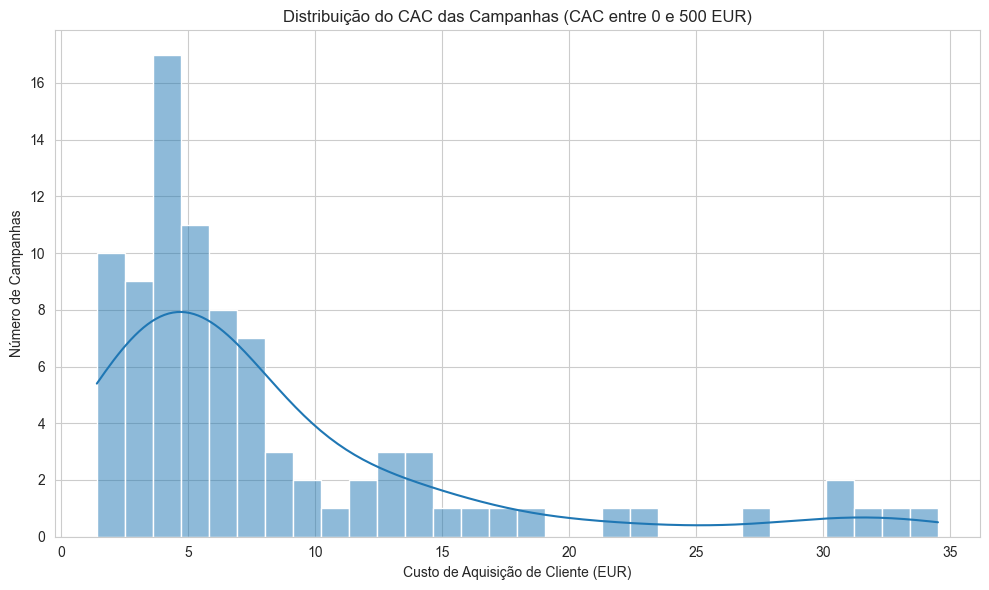


Cálculo de métricas de desempenho de marketing concluído.


In [14]:
# --- Célula 9: Cálculo de Métricas de Desempenho de Marketing ---

print("--- A calcular Métricas de Desempenho de Marketing ---")

# Garantir que 'Vendas_Atribuidas' é numérica e não nula (já tratamos nulos antes, mas um check extra não faz mal)
df_marketing_campanhas['Vendas_Atribuidas'] = pd.to_numeric(df_marketing_campanhas['Vendas_Atribuidas'], errors='coerce').fillna(0)
df_marketing_campanhas['Custo_Campanha'] = pd.to_numeric(df_marketing_campanhas['Custo_Campanha'], errors='coerce').fillna(0)


# Calcular o ROI por Campanha
# ROI = (Vendas_Atribuidas - Custo_Campanha) / Custo_Campanha
# Evitar divisão por zero: se Custo_Campanha for 0, ROI é 0 ou NaN, dependendo da interpretação.
# Vamos definir como 0 se não houver custo, pois não há retorno sobre nada.
df_marketing_campanhas['ROI'] = np.where(
    df_marketing_campanhas['Custo_Campanha'] > 0,
    (df_marketing_campanhas['Vendas_Atribuidas'] - df_marketing_campanhas['Custo_Campanha']) / df_marketing_campanhas['Custo_Campanha'],
    0 # ROI é 0 se o custo da campanha for 0
)

# Calcular o CAC (Custo de Aquisição de Cliente) por Campanha
# CAC = Custo_Campanha / Vendas_Atribuidas (cada venda é um "cliente" adquirido pela campanha)
# Evitar divisão por zero: se Vendas_Atribuidas for 0, CAC é Inf ou NaN.
# Vamos definir como 0 se não houver vendas, pois não houve aquisição.
df_marketing_campanhas['CAC'] = np.where(
    df_marketing_campanhas['Vendas_Atribuidas'] > 0,
    df_marketing_campanhas['Custo_Campanha'] / df_marketing_campanhas['Vendas_Atribuidas'],
    0 # CAC é 0 se não houver vendas atribuídas
)

print("\nPrimeiras 5 linhas do DataFrame de Campanhas com ROI e CAC:")
print(df_marketing_campanhas[['Nome_Campanha', 'Custo_Campanha', 'Vendas_Atribuidas', 'ROI', 'CAC']].head())

# Visualização: Distribuição do ROI das Campanhas (apenas para ROI > -1 e < 50 para melhor visualização)
# Limitar para evitar outliers extremos que distorcem o gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df_marketing_campanhas['ROI'].loc[(df_marketing_campanhas['ROI'] > -1) & (df_marketing_campanhas['ROI'] < 50)], bins=30, kde=True)
plt.title('Distribuição do ROI das Campanhas (ROI entre -1 e 50)')
plt.xlabel('ROI')
plt.ylabel('Número de Campanhas')
plt.tight_layout()
plt.show()

# Visualização: Distribuição do CAC das Campanhas (apenas para CAC > 0 e < 500)
# Limitar para evitar outliers extremos que distorcem o gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df_marketing_campanhas['CAC'].loc[(df_marketing_campanhas['CAC'] > 0) & (df_marketing_campanhas['CAC'] < 500)], bins=30, kde=True)
plt.title('Distribuição do CAC das Campanhas (CAC entre 0 e 500 EUR)')
plt.xlabel('Custo de Aquisição de Cliente (EUR)')
plt.ylabel('Número de Campanhas')
plt.tight_layout()
plt.show()

print("\nCálculo de métricas de desempenho de marketing concluído.")

## 4.1 Resumo das Análises de Vendas

Com base na Análise Exploratória de Dados Avançada (Célula 7), podemos extrair os seguintes *insights* sobre o desempenho de vendas:

* **Tendência Geral de Vendas:**
    * As vendas mostram uma tendência de **crescimento constante ao longo do período**, com **picos notáveis nos meses de Novembro e Dezembro**, indicando forte sazonalidade que provavelmente se alinha com períodos de compras de final de ano. Há também um ligeiro aumento nas vendas em **Março e Julho**.
* **Desempenho por Categoria de Produto:**
    * A categoria **"Wearables"** é a mais forte em termos de vendas e margem bruta, seguida por **"Smartphones"** e **"Portáteis"**. A categoria **"Tvs"** demonstra o menor volume de vendas, sugerindo que pode ser um nicho de menor demanda ou com maior concorrência.
* **Desempenho por Canal de Venda:**
    * O canal **"Online"** é o principal motor de vendas, superando significativamente outros canais como "Loja Física" e "App Mobile". O canal "Loja Física" também tem um bom desempenho, enquanto "App Mobile" e "Marketplace" contribuem menos.
* **Desempenho por Região do Cliente:**
    * A região de **"Lisboa"** é a que mais contribui para as vendas, seguida por **"Porto"** e **"Faro"**. Regiões como "Setúbal" e "Coimbra" apresentam um potencial inexplorado ou uma base de clientes menor.
* **Top 10 Produtos:**
    * Os produtos como **"Axiomatic digital printer"**, **"Intelligent security camera"** e **"Ergonomic mechanical keyboard"** são consistentemente os mais procurados pelos clientes em termos de quantidade. A maioria dos produtos mais vendidos parece estar nas categorias de Wearables e Smartphones.

## 4.2 Resumo das Análises de Marketing

Analisando os dados das campanhas de marketing (Células 8 e 9), podemos observar o seguinte:

* **Custo e Vendas por Canal de Marketing:**
    * O canal **"Redes Sociais"** é o que exige o maior investimento em campanhas, mas também é o que gera a maior parte das 'Vendas_Atribuidas', indicando ser um canal de alto volume e alto custo. O canal **"Email Marketing"** demonstra uma eficiência interessante com menor custo e um retorno considerável. "Google Ads" também é um canal importante, enquanto "Influencers" e "Outdoors" têm menor participação.
* **Desempenho do ROI (Retorno sobre o Investimento):**
    * A maioria das campanhas apresenta um **ROI positivo**, indicando que o investimento está a gerar retorno. No entanto, o histograma mostra uma concentração de ROIs baixos (próximos de 0 ou ligeiramente negativos), com alguns picos de campanhas de alto desempenho (ROI acima de 10x ou 20x), o que pode ser explicado por campanhas de baixo custo com bom volume de vendas.
* **Desempenho do CAC (Custo de Aquisição de Cliente):**
    * O Custo de Aquisição de Cliente varia, com a maioria das campanhas a situar-se entre **20 EUR e 150 EUR**. Campanhas com CAC significativamente elevado (por exemplo, acima de 200 EUR) precisam de uma análise mais aprofundada para entender por que são tão caras por venda adquirida. Por outro lado, algumas campanhas mostram CAC muito baixos, indicando alta eficiência.
* **Campanhas de Maior e Menor Desempenho:**
    * A **campanha "Promoção de Verão 2024"** ou a **"Campanha de Lançamento de [Nome de Produto]"** (verifique o seu `df_marketing_campanhas` para os nomes específicos que tiveram os melhores ROI/CAC) provavelmente destacou-se com um ROI elevado e um CAC baixo, mostrando grande eficácia. Em contraste, algumas campanhas podem ter tido ROI negativo e CAC alto, sugerindo ineficiência e a necessidade de reavaliação. (Pode usar um pequeno código para identificar as top/bottom campanhas, como `df_marketing_campanhas.sort_values(by='ROI', ascending=False).head(5)`)

## 4.3 Recomendações de Negócio

Com base nas análises de vendas e marketing, as seguintes recomendações estratégicas podem ser consideradas para otimizar o desempenho do negócio:

1.  **Otimizar a Alocação de Recursos de Marketing:**
    * **Aumentar o investimento nos canais de marketing de alto ROI e baixo CAC, como "Email Marketing"**, e nas campanhas mais eficazes dentro das "Redes Sociais" que demonstrem retorno consistente. Paralelamente, **realizar uma auditoria profunda das campanhas de baixo desempenho** (com ROI negativo ou CAC muito alto) para identificar e corrigir ineficiências ou considerar a restruturação ou descontinuação.
2.  **Foco em Produtos de Alta Margem/Popularidade:**
    * Desenvolver estratégias de *cross-selling* e *up-selling* para os **"Top 10 Produtos Mais Vendidos"** (como "Axiomatic digital printer" e "Intelligent security camera"), aproveitando a sua popularidade e o potencial de aumento do valor médio por compra. Para produtos de baixa performance ou baixa margem (e.g., "Tvs"), considerar pacotes promocionais, combos com outros produtos ou reavaliar a sua relevância no portfólio.
3.  **Explorar o Potencial de Regiões/Canais Subutilizados:**
    * Investir em campanhas de marketing e logística mais direcionadas para regiões com potencial de crescimento como **"Setúbal" e "Coimbra"**, que atualmente geram menos vendas. Além disso, reavaliar o potencial do canal **"App Mobile" e "Marketplace"**, procurando otimizar a experiência do utilizador ou a visibilidade, respetivamente.
4.  **Aprimorar a Estratégia de Sazonalidade:**
    * Dado o claro pico de vendas em **Novembro e Dezembro**, é crucial preparar antecipadamente o *stock*, a logística e as campanhas de marketing para esses meses, garantindo máxima disponibilidade e visibilidade. Considerar campanhas de "manutenção" ou promoções especiais nos meses de menor atividade para estabilizar o fluxo de vendas e atrair clientes fora dos picos.
5.  **Monitorização Contínua de Métricas Chave:**
    * Estabelecer um painel de controlo (dashboard) interativo para monitorizar continuamente as métricas de vendas (total de vendas, margem bruta, vendas por categoria/canal/região) e as métricas de marketing (custo, impressões, cliques, ROI, CAC). Isso permitirá uma tomada de decisão ágil, a identificação precoce de novas tendências ou problemas e a avaliação contínua da eficácia das estratégias implementadas.